In [111]:
import control as co
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from identify_it import IdentifyIt

# Тест на ступеньке

In [112]:
file_path = "test_data/data_for_real.csv"
degree = 3
x, y = np.loadtxt(file_path, delimiter=',', unpack=True)
ident = IdentifyIt(x=x, y=y, degree=3, method=1)
ident.error

Running method...
LSM is runing...


0.021986783411512795

# Произвольный сигнал

In [78]:
# хочу подать часть синусоиды на какое-нибудь апериодическое звено второго порядка:
# делаю само звено:
sp.var('s')
T1 = 1.2
T2 = 0.5
num = [1]
den = [T1*T2, T2, 1]
aper = co.tf(num, den)
aper

TransferFunction(array([1]), array([0.6, 0.5, 1. ]))

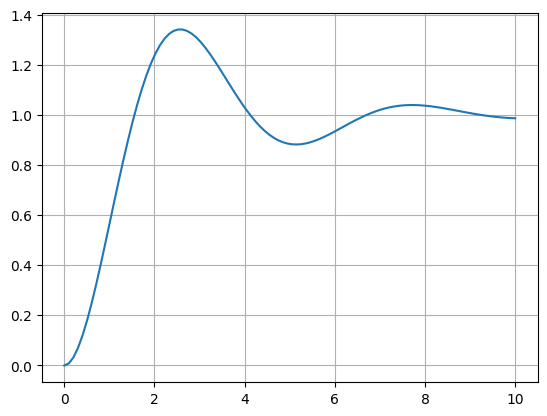

In [129]:
# Переходная хар-ка моего звена:
t, y = co.step_response(aper, 10)
plt.grid(True)
plt.plot(t, y);

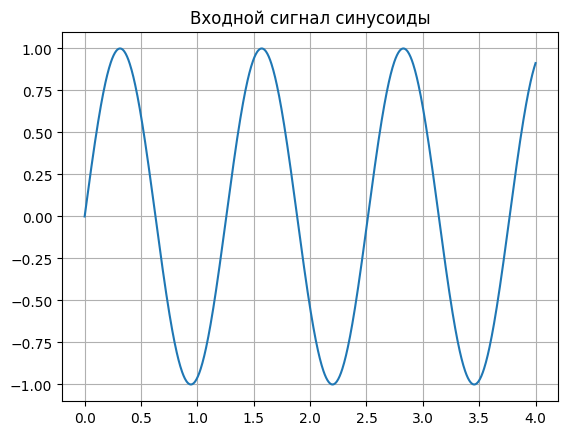

In [89]:
# Теперь произвольный сигнал на входе, допустим, часть синусоиды:
in_sin = np.linspace(0, 4, 1000)
u = np.sin(5*in_sin)
plt.title('Входной сигнал синусоиды')
plt.grid(True)
plt.plot(in_sin, u);

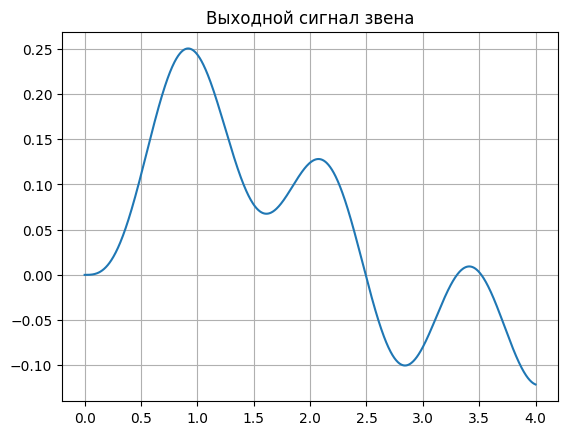

In [88]:
# Получаем такой выходной сигнал из звена:
t_f, y_f = co.forced_response(aper, np.linspace(0, 4, 1000), u)
plt.grid(True)
plt.title("Выходной сигнал звена")
plt.plot(t_f, y_f);

Running method...
LSM is runing...


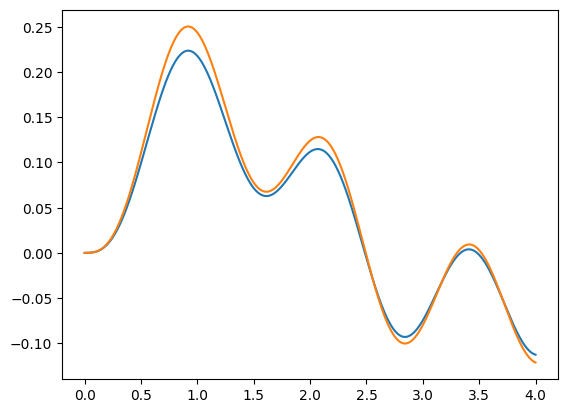

In [125]:
# Пытаемся идентифицировать методом наименьших квадратов:
ident2 = IdentifyIt(x=t_f, y=y_f, degree=5, method=1, u=u)
plt.plot(ident2.x, ident2.y_m);
plt.plot(t_f, y_f);

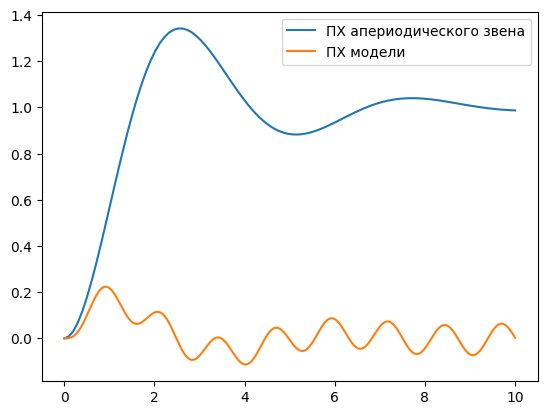

In [138]:
# Хорошо, эксперимент удался, но давайте теперь получим П.Х. этого звена и
# сравним резульататы:
t_a, y_a = co.step_response(aper, 10)
t_m, y_m = co.step_response(ident2.model, 10)
plt.plot(t_a, y_a, label='ПХ апериодического звена');
plt.plot(t_m, y_m, label='ПХ модели');
plt.legend();

In [139]:
aper

TransferFunction(array([1]), array([0.6, 0.5, 1. ]))

In [140]:
ident2.model

TransferFunction(array([ 3.87466675e-07, -1.72835380e-07, -1.83403690e-07, -3.14442083e-08,
        2.24361953e-10]), array([ 1.        , -3.64304332,  4.57728046, -1.87299932, -0.41366773,
        0.35242993]), 0.004004004004004004)

In [ ]:
# TODO:
# [x]: Проверить и воссоздать модель апериодического звена по оригинально ПХ
# [x]: Сравнить форму и вид ПФ
# Результаты:
# Форма и вид ПФ не свопадают, потому что МНК даёт ДПФ, а ВИМ работает, но не очень
# хорошо

In [152]:
ident_step_resp = IdentifyIt(t_a, y_a, 1, 1)
ident_step_resp.error

Running method...
LSM is runing...


3.885049615777187

In [143]:
ident_step_resp.model

TransferFunction(array([ 1.62859363e-02, -1.12634513e-14]), array([ 1.        , -1.90298436,  0.91927029]), 0.10101010101010101)